# Praca domowa 3
## Karol Degórski

## Analiza zbioru danych pogodowych w Australii

## Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

## Wczytanie danych dotyczących pogody w Australii

In [2]:
australia_df = pd.read_csv('australia.csv')
australia_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [3]:
australia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

Widzimy, że nie ma żadnych braków danych oraz że wszystkie wartości są liczbowe

## Podział danych na zbiór treningowy i testowy

Zmienną celu w naszym zadaniu jest RainTomorrow, określająca, czy jutro będzie padał deszcz (0 - jeśli nie będzie padał, 1 - jeśli będzie padał)

In [4]:
X = australia_df.drop('RainTomorrow', axis = 1)
y = australia_df.RainTomorrow

In [5]:
from sklearn.model_selection import train_test_split

Dokonujemy podziału na zbiór testowy i treningowy (zbiór testowy będzie stanowił 30% całego zbioru)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Wybór miar oceny jakości klasyfikatorów

W mojej pracy domowej posłużę się następującymi miarami:

Dokładność, czyli prawdopodobieństwo prawidłowej klasyfikacji

In [7]:
from sklearn.metrics import accuracy_score

AUC, czyli pole powierzchni pod krzywą ROC

In [8]:
from sklearn.metrics import roc_auc_score

Miara f1, czyli średnia harmoniczna z precyzji i czułości. Co prawda miara nie uwzględnia wyników prawdziwie negatywnych, ale daje ocenę balansu między czułością a precyzją

In [9]:
from sklearn.metrics import f1_score

Recall, czyli stosunek poprawnie rozpoznanych elementów z danej klasy do wszystkich, które model powinien rozpoznać, czyli do całej danej klasy

In [10]:
from sklearn.metrics import recall_score

Wykorzystam również classification_report, który zawiera informacje o wartościach podstawowych miar oceny jakości klasyfikatora

In [11]:
from sklearn.metrics import classification_report

## Modele

W niniejszej pracy domowej użyję trzech modeli: lasu losowego, XGBoost'a i SVM

### Las losowy

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier(n_estimators=500,
                           max_depth=8, 
                           min_samples_split = 2,
                           max_features = 8, 
                           random_state = 0,
                           n_jobs = -1)

### Wybrane parametry:
- n_estimators - liczba drzew w lesie
- max_depth - maksymalna głębokość drzewa
- min_samples_split - minimalna liczba obserwacji potrzebnych do dokonania podziału
- max_features -  maksymalna liczba elementów, które należy stosować przy każdym podziale 
- random_state - ziarno dla generatora liczb losowych podczas podziału
- n_jobs - liczba wykorzystywanych wątków (-1 oznacza wszystkie dostępne)

In [14]:
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

In [15]:
print('accuracy: ', accuracy_score(y_test, y_hat))
print('roc_auc_score: ', roc_auc_score(y_test, y_hat))
print('f1_score: ', f1_score(y_test, y_hat))
print('recall_score: ', recall_score(y_test, y_hat))
rfc_recall = recall_score(y_test, y_hat)

accuracy:  0.8536570955925795
roc_auc_score:  0.725702970193225
f1_score:  0.6010629731035594
recall_score:  0.49496021220159153


In [16]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13156
           1       0.77      0.49      0.60      3770

    accuracy                           0.85     16926
   macro avg       0.82      0.73      0.76     16926
weighted avg       0.85      0.85      0.84     16926



### XGBoost

In [17]:
from xgboost import XGBClassifier

In [18]:
xgbc=XGBClassifier(random_state=1,
                    learning_rate=0.31,
                    booster='gbtree', 
                    max_depth=4, 
                    eval_metric="logloss")

### Wybrane parametry:
- random_state - ziarno dla generatora liczb losowych podczas podziału
- learning_rate - zapobiega nadmiernego dopasowaniu modelu (jest to zmniejszenie wielkości stopnia)
- booster - używany w modelu booster
- max_depth - maksymalna głębokość drzewa
- eval_metric - metryka używana do ewaluacji działania modelu

In [19]:
xgbc.fit(X_train, y_train)
y_hat = xgbc.predict(X_test)

In [20]:
print('accuracy: ', accuracy_score(y_test, y_hat))
print('roc_auc_score: ', roc_auc_score(y_test, y_hat))
print('f1_score: ', f1_score(y_test, y_hat))
print('recall_score: ', recall_score(y_test, y_hat))
xgbc_recall = recall_score(y_test, y_hat)

accuracy:  0.8600968923549569
roc_auc_score:  0.7517029072876149
f1_score:  0.6391344102407802
recall_score:  0.5562334217506631


In [21]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13156
           1       0.75      0.56      0.64      3770

    accuracy                           0.86     16926
   macro avg       0.82      0.75      0.78     16926
weighted avg       0.85      0.86      0.85     16926



### SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm = SVC(kernel='rbf', gamma=0.001, C=10)

### Wybrane parametry:
- kernel - używane w modelu jądro
- gamma - współczynnik dla jądra
- C - parametr regularyzacyjny

In [24]:
svm.fit(X_train, y_train)
y_hat = svm.predict(X_test)

In [25]:
print('accuracy: ', accuracy_score(y_test, y_hat))
print('roc_auc_score: ', roc_auc_score(y_test, y_hat))
print('f1_score: ', f1_score(y_test, y_hat))
print('recall_score: ', recall_score(y_test, y_hat))
svm_recall = recall_score(y_test, y_hat)

accuracy:  0.857910906298003
roc_auc_score:  0.7344950776360072
f1_score:  0.6161213088587391
recall_score:  0.5119363395225465


In [26]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13156
           1       0.77      0.51      0.62      3770

    accuracy                           0.86     16926
   macro avg       0.82      0.73      0.76     16926
weighted avg       0.85      0.86      0.85     16926



## Podsumowanie

Wybór miary oceny klasyfikatora nie zawsze jest łatwy. Wydawać by się mogło, że użycie miary accurancy (dokładności) jest zawsze najlepszym wyborem. Jednakże, czy jeśli nasz model będzie miał dokładność 90% i zawsze przewidywał brak deszczu, to czy taki model uznamy za optymalny? Oczywiście, że nie. Interesuje nas przecież jeszcze  jakie jest prawdopodobieństwo, że jeśli nasz model przewidział, że będzie podało, to faktycznie będzie padało, oraz prawdopodobieństwo tego, że jeśli nasz model przewidział, że nie będzie padało, to faktycznie nie pada. Aby się tego dowiedzieć należy użyć precyzji. Warto również użyć miary f1 pozwalającej w postaci jednej liczby zawrzeć informację o balansie między czułością, a precyzją. Najlepiej zatem patrzeć szeroko na różne miary i wybrać taką, która jest istotna do oceny działania danego modelu.

Jeśli jednak musiałbym wybrać tylko jedną miarę oceny jakości klasyfikatorów dla tego problemu to byłaby nią recall. Dla problemu przewidywania czy będzie padał deszcz bardziej istotne jest przewidywanie w większej liczbie przypadków deszczu, nawet jeśli nie będzie potem padało, niż przewidzieć słońce, a w rzeczywistości padałby deszcz. W końcu sprawdzając pogodę i widząc że może padać, wystarczy że weźmiemy parasolkę, a wtedy będziemy zabezpieczni na każdą ewentualność. Gdyby jednak przewidziano słońce, a padałby deszcz, to zmoklibyśmy, czego większość osób wolałaby uniknąć.

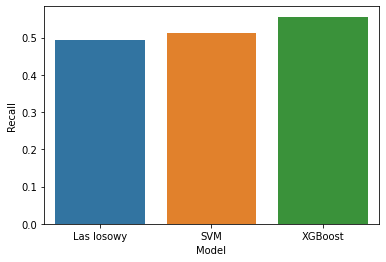

In [27]:
x = ['Las losowy', 'XGBoost', 'SVM']
y = [rfc_recall, xgbc_recall, svm_recall]
df = pd.DataFrame({'Model': x,
                  'Recall': y})
sns.barplot(data = df, x = 'Model', y = 'Recall', order=df.sort_values('Recall').Model)
plt.show()

Zatem biorąc pod uwagę powyższe spostrzeżenia uważam, że najlepszym klasyfikatorem jest XGBoost, ponieważ uzyskał najwyższą wartość miary recall dla klasy 1 (będzie padał deszcz). Ponadto model ten uzyskał również najwyższą wartość accuracy oraz najwyższą wartość AUC i miary f1.